# Design CTP-10 Aire DNA-MERFISH library for Aire-inducible gene introns

by Pu Zheng

2021.4.15



# Table of contents


> 0. [Minimum required packages and settings](#0)
>>
>> 0.1: [import required packages](#0.1)
>
> 1. [Extract region sequences](#1)

<a id='0.1'></a>
## 0.1 load required packages

In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

# library design specific tools
from ImageAnalysis3.library_tools import LibraryDesigner as ld
from ImageAnalysis3.library_tools import LibraryTools as lt
# biopython imports
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Blast.Applications import NcbiblastnCommandline
from Bio.Blast import NCBIXML

24188


<a id='1'></a>
# 1 Extract region sequences

In [2]:
## Some folders
# human genome
reference_folder = r'\\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl'
genome_folder = os.path.join(reference_folder, 'Genome')
# Library directories
pool_folder = r'\\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire'

In [3]:
resolution = 0
flanking = 0
# folder for sub-pool
library_folder = os.path.join(pool_folder, f'smFISH_Aire_Krt5')
if not os.path.exists(library_folder):
    print(f"create library folder: {library_folder}")
    os.makedirs(library_folder)
# folder for fasta sequences
sequence_folder = os.path.join(library_folder, 'sequences')
if not os.path.exists(sequence_folder):
    print(f"create sequence folder: {sequence_folder}")
    os.makedirs(sequence_folder)
# folder to save result probes
report_folder = os.path.join(library_folder, 'reports')
if not os.path.exists(report_folder):
    print(f"create report folder: {report_folder}")
    os.makedirs(report_folder)
    
print(f"-- library_folder: {library_folder}")
print(f"-- sequence_folder: {sequence_folder}")
print(f"-- report_folder: {report_folder}")

-- library_folder: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\smFISH_Aire_Krt5
-- sequence_folder: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\smFISH_Aire_Krt5\sequences
-- report_folder: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\smFISH_Aire_Krt5\reports


## 1.1 load gene list

In [4]:
import pandas as pd

In [5]:
# mimic the full list
gene_df = pd.DataFrame(['Aire', 'Krt5'], columns=['Gene'])

In [7]:
# load gene reference
reload(library_tools.references)
reload(library_tools.sequences)
ref_filename = os.path.join(reference_folder, 'Transcriptome', 'Mus_musculus.GRCm38.102.chr.gff3')
with library_tools.references.gff3_reader(ref_filename, auto_read=False, load_savefile=True) as ref_rd:
    ## example commands
    #infos = _handle.load_all()
    #ref_rd._load_headers()
    #gene_infos = ref_rd.load_gene_by_id('ENSMUSG00000064842')
    #gene_dict = ref_rd.parse_gene_info(gene_infos)
    #gene_info_dict = ref_rd._batch_parse_gene_info()
    ref_save_dict = ref_rd._save_to_file(overwrite=False)
# searching example
matched_gene = ref_rd._search_gene_by_id('gene:ENSMUSG00000089613')
print(matched_gene[0]['infos']['Name'])
matched_gene = ref_rd._search_gene_by_name('Ccl21a')
print(matched_gene[0]['infos']['ID'])

- loading from save_file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Transcriptome\Mus_musculus.GRCm38.102.chr.pkl
opening ref_file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Transcriptome\Mus_musculus.GRCm38.102.chr.gff3
- save_filename:\\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Transcriptome\Mus_musculus.GRCm38.102.chr.pkl, skip saving.
Gm23504
gene:ENSMUSG00000094686


In [18]:
from tqdm.notebook import tqdm
gene_dicts = []
for _gene in tqdm(gene_df['Gene']):
    if _gene == 'Lect1': # there is one gene that actually has different name
        _gene = "Cnmd" 
    _gds = ref_rd._search_gene_by_name(_gene)
    if len(_gds) == 1:
        gene_dicts.append(_gds[0])
    else:
        print(_gene)

  0%|          | 0/2 [00:00<?, ?it/s]

## Load sequences

In [20]:
# prepare sequence reader
reload(library_tools.references)
reload(library_tools.sequences)

seq_rd = library_tools.sequences.RNA_sequence_reader(genome_folder)
seq_rd.load_sequences() # load genomic sequences

-- load sequence: 1, size=195471971
-- load sequence: 10, size=130694993
-- load sequence: 11, size=122082543
-- load sequence: 12, size=120129022
-- load sequence: 13, size=120421639
-- load sequence: 14, size=124902244
-- load sequence: 15, size=104043685
-- load sequence: 16, size=98207768
-- load sequence: 17, size=94987271
-- load sequence: 18, size=90702639
-- load sequence: 19, size=61431566
-- load sequence: 2, size=182113224
-- load sequence: 3, size=160039680
-- load sequence: 4, size=156508116
-- load sequence: 5, size=151834684
-- load sequence: 6, size=149736546
-- load sequence: 7, size=145441459
-- load sequence: 8, size=129401213
-- load sequence: 9, size=124595110
-- load sequence: MT, size=16299
-- load sequence: X, size=171031299
-- load sequence: Y, size=91744698
-- load sequence: JH584299.1, size=953012
-- load sequence: GL456233.1, size=336933
-- load sequence: JH584301.1, size=259875
-- load sequence: GL456211.1, size=241735
-- load sequence: GL456350.1, size=227

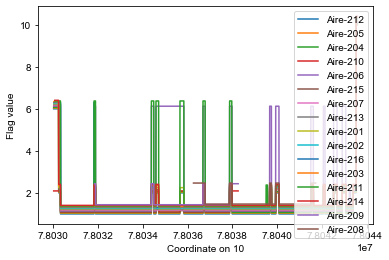

-- searching among 1 references
-- a match found in record: 10.


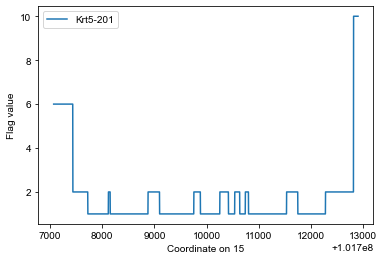

-- searching among 1 references
-- a match found in record: 15.


In [21]:
# load smallest exons for given genes by sequence reader
%matplotlib inline
sm_intron_record_dict = seq_rd.find_smallest_introns(gene_dicts, save=True)

In [23]:
sm_intron_files = seq_rd._save_sequences_from_dict('small_intron_dict', sequence_folder, merge=False)

-- saving small_intron_dict sequences into folder: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\smFISH_Aire_Krt5\sequences
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\smFISH_Aire_Krt5\sequences\Aire_small_intron_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\smFISH_Aire_Krt5\sequences\Aire_small_intron_2.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\smFISH_Aire_Krt5\sequences\Aire_small_intron_3.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\smFISH_Aire_Krt5\sequences\Aire_small_intron_4.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\smFISH_Aire_Krt5\sequences\Aire_small_intron_5.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\smFISH_Aire_Krt5\sequences\Aire_small_intron_6.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\smFISH_Aire_Krt5\sequences\Aire_small_intron_7.fasta


## load isoforms for data processsing

- find mRNA for gene: Aire


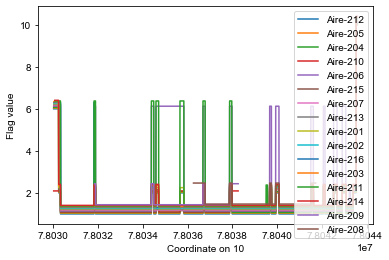

-- searching among 1 references
-- a match found in record: 10.
-- extracting transcript for gene_Aire_id_transcript:ENSMUST00000145975_name_Aire-212_type_mRNA_strand_-_loc_10:78030022-78043580, size=1926
-- searching among 1 references
-- a match found in record: 10.
-- extracting transcript for gene_Aire_id_transcript:ENSMUST00000130972_name_Aire-205_type_mRNA_strand_-_loc_10:78030022-78043580, size=1923
-- searching among 1 references
-- a match found in record: 10.
-- extracting transcript for gene_Aire_id_transcript:ENSMUST00000128241_name_Aire-204_type_mRNA_strand_-_loc_10:78030022-78043580, size=1938
-- searching among 1 references
-- a match found in record: 10.
-- extracting transcript for gene_Aire_id_transcript:ENSMUST00000143548_name_Aire-210_type_lnc_RNA_strand_-_loc_10:78030023-78038258, size=1265
-- searching among 1 references
-- a match found in record: 10.
-- extracting transcript for gene_Aire_id_transcript:ENSMUST00000131028_name_Aire-206_type_mRNA_strand_-_loc_10:7

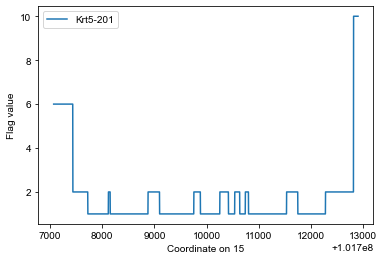

-- searching among 1 references
-- a match found in record: 15.
-- extracting transcript for gene_Krt5_id_transcript:ENSMUST00000023709_name_Krt5-201_type_mRNA_strand_-_loc_15:101707070-101712898, size=2197


In [24]:
# load smallest exons for given genes by sequence reader
mrna_record_dict = seq_rd.find_transcript_isoforms(gene_dicts, save=True)

In [26]:
isoform_folder = os.path.join(sequence_folder, 'isoforms')
if not os.path.exists(isoform_folder):
    print(f"create folder: {isoform_folder}.")
    os.makedirs(isoform_folder)
isoform_files = seq_rd._save_sequences_from_dict('isoform_mRNA_dict', isoform_folder, merge=True)

create folder: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\smFISH_Aire_Krt5\sequences\isoforms.
-- saving isoform_mRNA_dict sequences into folder: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\smFISH_Aire_Krt5\sequences\isoforms
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\smFISH_Aire_Krt5\sequences\isoforms\Aire_isoform_mRNA_merged_16_isoforms.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\smFISH_Aire_Krt5\sequences\isoforms\Krt5_isoform_mRNA_merged_1_isoforms.fasta
- 2 fasta files saved.


In [ ]:
# clear the memory
del(seq_rd)

<a id='2'></a>
# 2. Design probe targeting sequences by probe_designer

run probe_designer, remeber to clear the memory usage because each table should take ~32GB

<a id='2.1'></a>
## 2.1 Construct count table with all the 17-mers in the genome

Only do this if you don't have pre-built 17-mer

However you can do almost the same thing for your own library during quality check

This library requires mm10 genome

In [5]:
overwrite_table = False

### construct map for whole genome

In [8]:
reload(library_tools.design)
 
genome_table_file = os.path.join(reference_folder, 'GRCm38_genome_17w.npy')

if not os.path.exists(genome_table_file) or overwrite_table:
    # genome
    _genome_filenames = [os.path.join(genome_folder, _fl) 
         for _fl in os.listdir(genome_folder) 
         if _fl.split(os.extsep)[-1]=='fasta' or _fl.split(os.extsep)[-1]=='fa']
    print(len(_genome_filenames))

    ct = library_tools.design.countTable(word=17,save_file=genome_table_file, 
                       sparse=False)
    ct.verbose=True

    ct.read(_genome_filenames) # read sequences from fasta files

    ct.consume_loaded(num_threads=24) # convert sequences into integers

    ct.complete(verbose=True)

    ct.save()

    # clear RAM if contructed countable 
    del(ct)

In [89]:
genome_table_file = os.path.join(reference_folder, 'GRCm38_genome_17w.npy')

ct = library_tools.design.countTable(word=17,save_file=genome_table_file, 
                       sparse=False)
ct.load()

In [91]:
np.mean(ct.matrix==0)

0.9083192410762422

1717986918.4

### construct map for transcriptome

In [9]:
from tqdm import tqdm
# transcriptome
transcriptome_folder = os.path.join(reference_folder, 'Transcriptome')

transcriptome_table_file = os.path.join(reference_folder, 'GRCm38_transcriptome_17w.npy')

if not os.path.exists(transcriptome_table_file) or overwrite_table:
    # transcriptome
    _transcriptome_filenames = [os.path.join(transcriptome_folder, _fl) 
         for _fl in os.listdir(transcriptome_folder) 
         if _fl.split(os.extsep)[-1]=='fasta' or _fl.split(os.extsep)[-1]=='fa']
    print(len(_transcriptome_filenames))
    
    ct = library_tools.design.countTable(word=17,save_file=transcriptome_table_file, 
                       sparse=False)
    ct.verbose=True

    ct.read(_transcriptome_filenames) # read sequences from fasta files

    ct.consume_loaded(num_threads=24) # convert sequences into integers

    ct.complete(verbose=True)

    ct.save()
    
    # clear RAM if contructed countable 
    del(ct)

### construct map for repeats from RepBase

In [10]:
from tqdm import tqdm
# repeat
repeat_folder = r'\\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\Repbase'

repeat_table_file = os.path.join(reference_folder, 'Repbase_v2603_repeat_17w.npy')

if not os.path.exists(repeat_table_file) or overwrite_table:
    # repeat
    _repeat_filenames = [os.path.join(repeat_folder, _fl) 
         for _fl in os.listdir(repeat_folder) 
         if _fl.split(os.extsep)[-1]=='fasta' or _fl.split(os.extsep)[-1]=='fa']
    print(len(_repeat_filenames))
    
    ct = library_tools.design.countTable(word=17,save_file=repeat_table_file, 
                       sparse=False)
    ct.verbose=True

    ct.read(_repeat_filenames) # read sequences from fasta files

    ct.consume_loaded(num_threads=24) # convert sequences into integers

    ct.complete(verbose=True)

    ct.save()
    
    # clear RAM if contructed countable 
    del(ct)

### construct map for isoforms for this library

In [44]:
from tqdm import tqdm
# isoform
# RNA specific: get isoform files
isoform_folder = os.path.join(sequence_folder, 'isoforms')

isoform_table_file = os.path.join(isoform_folder, 'library_isoform_17w.npy')

if not os.path.exists(isoform_table_file) or overwrite_table:
    # isoform
    isoform_files = [os.path.join(isoform_folder, _fl) 
                     for _fl in os.listdir(isoform_folder) 
                     if _fl.split(os.extsep)[-1] == 'fasta' or _fl.split(os.extsep)[-1] == 'fa']
    print(len(isoform_files))
    
    ct = library_tools.design.countTable(word=17,save_file=isoform_table_file, 
                       sparse=False)
    ct.verbose=True

    ct.read(isoform_files) # read sequences from fasta files

    ct.consume_loaded(num_threads=24) # convert sequences into integers

    ct.complete(verbose=True)

    ct.save()
    
    # clear RAM if contructed countable 
    del(ct)

2
- Start multi-processing comsume 17 sequences 24 threads, finish in 3.286s
- Total sequences loaded: 29202
Time to compute unique and clip: 0.20215129852294922
Time to update matrix: 0.02001476287841797
- start saving to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\smFISH_Aire_Krt5\sequences\isoforms\library_isoform_17w.npy


In [69]:
class simpleDict():
    _slots__ = [1,2,3]
    
    def __init__(self, *kwargs):
        for _i in kwargs:
            print(_i)
            #self._i = _i
            setattr(self, str(_i), _i)
            

In [75]:
test_simpledict = simpleDict(*(1,2,3,4,5,6,7,8))

1
2
3
4
5
6
7
8


In [83]:
np.mean(pb_designer.map_transcriptome[0].matrix == 0)

0.9935785528505221

In [ ]:
genome_ct = 

In [79]:
test_simpledict

In [77]:
getattr(test_simpledict, '2')

2

In [64]:
test_simpledict.__dict__

{'_i': 3}

In [73]:
test_dict = {1:1,2:2,3:3}

In [78]:
sys.getsizeof(test_dict), sys.getsizeof(test_simpledict)

(240, 56)

<a id='2.2'></a>
## 2.2 Design probes

In [162]:
# requires pre_defined genome_folder and library_folder
# Indices
genome_index = os.path.join(reference_folder, 'GRCm38_genome_17w.npy')

transcriptome_index = os.path.join(reference_folder, 'GRCm38_transcriptome_17w.npy') 

repeat_index = os.path.join(reference_folder, 'Repbase_v2603_repeat_17w.npy')

isoform_folder = os.path.join(sequence_folder, 'isoforms')
isoform_index = os.path.join(isoform_folder, 'library_isoform_17w.npy')

# get input files 
input_files = glob.glob(os.path.join(sequence_folder, '*.fasta'))

print(f"{len(input_files)} regions loaded to design probes.")

if not os.path.exists(report_folder):
    os.makedirs(report_folder)
    
# filename to save probe reports
save_file = os.path.join(report_folder, f'merged_probes_genome_ref.pbr')
print(save_file)

22 regions loaded to design probes.
\\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\smFISH_Aire_Krt5\reports\merged_probes_genome_ref.pbr


### create pb_designer class

In [164]:
reload(library_tools)
reload(library_tools.design)

pb_designer = library_tools.design.pb_reports_class(
    sequence_dic={'file':input_files,
                  'rev_com':True, # design reverse-complement of given sequences 
                  'two_stranded':False, # design two strands
                 },
    map_dic={'genome':{'file':genome_index,'rev_com':False,'two_stranded':True},
             #'transcriptome':{'file':transcriptome_index,'rev_com':True,'two_stranded':False},
             'rep_genome':{'file':repeat_index,'rev_com':False,'two_stranded':True},
             'self_sequences':{'file':input_files,'force_list':True,'rev_com':True,'two_stranded':False}, # RNA specific
             #'isoforms':{'file':isoform_index,'force_list':True,'rev_com':True,'two_stranded':False}, # RNA specific
             #'self_sequences':{'file':input_files,'force_list':True,'rev_com':False,'two_stranded':True}, # DNA specific
             },
        save_file=save_file,
    params_dic={'word_size':17,'pb_len':30,'buffer_len':1,'max_count':2**16-1,
                'check_on_go': False, # whether automatically check probes
                'auto': False, # whether automatically convert reference maps
               },
    check_dic={('genome','self_sequences'): (30-17+1)*2-5,
               'rep_genome': 0,
               #('transcriptome','isoforms'): 5, 
               'gc':[0.4,0.7],
               'tm': [47+0.65*30,47+0.65*30+10], # 37C incubation + 30% formamide + 5C for the melting curve
               'masks': ['AAAAA','TTTTT','CCCCC','GGGGG', # Quartet-repeats
                         'GAATTC','CTTAAG', # EcoRI sites
                         'GGTACC','CCATGG',], # KpnI sites
               }
    )
print(pb_designer)
pb_designer.load_from_file(load_probes_only=True)


Probe designer derived from Bogdan Bintu:
https://github.com/BogdanBintu/ChromatinImaging/blob/master/LibraryDesign/LibraryDesigner.py
by Pu Zheng, 2020.11

Major changes:
    1. allow design of two strands
    2. separate reverse_complement (rev_com) and from two strands (two_stranded) as 
    two different inputs for map_dic and sequence_dic
    3. replace 'local_genome' with 'self_sequences' to be more explicit, and only 
    exclude the counts for the corresponding self_sequence within each input. 

Key information:
    - number of input_sequence(s): 22
    - save_file location: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\smFISH_Aire_Krt5\reports\merged_probes_genome_ref.pbr

- Fail to load from savefile: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\smFISH_Aire_Krt5\reports\merged_probes_genome_ref.pbr, file doesn't exist.


False

### calculate probe reports

In [165]:
reload(library_tools)
reload(library_tools.design)
overwrite_candidate_probes = False
if len(pb_designer.cand_probes) == 0 or overwrite_candidate_probes:
    pb_designer.computeOTmaps() # load the tables 
    pb_designer.compute_pb_report() # design candidate probes

-- setting attribute: map_genome
--- finish map_genome in 83.351s.
-- setting attribute: map_rep_genome
--- finish map_rep_genome in 83.424s.
Time(s): 166.77553820610046
- Designing targeting sequence for 22 regions
-- designing region: gene_Aire_id_gene:ENSMUSG00000000731_name_Aire-208-smintron-1_type_smintron_strand_-_loc_10:78043271-78043388 region: 0, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\smFISH_Aire_Krt5\sequences\Aire_small_intron_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.176s.
in 0.194s.
-- designing region: gene_Aire_id_gene:ENSMUSG00000000731_name_Aire-208-smintron-2_type_smintron_strand_-_loc_10:78043078-78043216 region: 1, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\smFISH_Aire_Krt5\sequences\Aire_small_intron_2.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.172s.
in 0.568s.
-- designing region: gene_

--- finish map_self_sequences in 0.197s.
in 0.618s.
- Save reports into file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\smFISH_Aire_Krt5\reports\merged_probes_genome_ref.pbr


In [153]:
cand_tms = [_v['tm'] for _v in pb_designer.cand_probes.values()]

In [154]:
np.median(cand_tms)

72.68604681228084

<IPython.core.display.Javascript object>


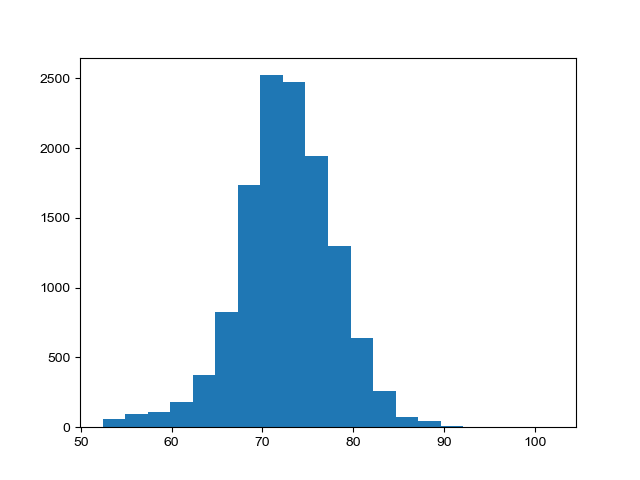

(array([  58.,   94.,  109.,  182.,  375.,  826., 1736., 2523., 2476.,
        1944., 1296.,  640.,  256.,   73.,   47.,    8.,    3.,    4.,
           4.,    5.]),
 array([ 52.3826531 ,  54.86678269,  57.35091228,  59.83504187,
         62.31917146,  64.80330105,  67.28743064,  69.77156023,
         72.25568982,  74.73981941,  77.223949  ,  79.70807859,
         82.19220818,  84.67633777,  87.16046736,  89.64459695,
         92.12872654,  94.61285613,  97.09698572,  99.58111531,
        102.0652449 ]),
 <BarContainer object of 20 artists>)

In [152]:
plt.figure()
plt.hist(cand_tms,20)

### check probes

In [167]:
overwrite_filtered_probes = False

if len(pb_designer.kept_probes) == 0 or overwrite_filtered_probes:
    pbs, pb_scores = pb_designer.check_probes()

-- check region:0 gene_Aire_id_gene:ENSMUSG00000000731_name_Aire-208-smintron-1_type_smintron_strand_-_loc_10:78043271-78043388, 89 candidate probes
--- 25 probes passed check_dic selection.
finish in 0.005s, 1 probes kept.
-- check region:1 gene_Aire_id_gene:ENSMUSG00000000731_name_Aire-208-smintron-2_type_smintron_strand_-_loc_10:78043078-78043216, 110 candidate probes
--- 58 probes passed check_dic selection.
finish in 0.008s, 2 probes kept.
-- check region:2 gene_Aire_id_gene:ENSMUSG00000000731_name_Aire-208-smintron-3_type_smintron_strand_-_loc_10:78042674-78042901, 199 candidate probes
--- 162 probes passed check_dic selection.
finish in 0.019s, 6 probes kept.
-- check region:3 gene_Aire_id_gene:ENSMUSG00000000731_name_Aire-208-smintron-4_type_smintron_strand_-_loc_10:78042137-78042516, 351 candidate probes
--- 120 probes passed check_dic selection.
finish in 0.021s, 8 probes kept.
-- check region:4 gene_Aire_id_gene:ENSMUSG00000000731_name_Aire-208-smintron-5_type_smintron_stran

### save probes

In [168]:
overwrite_savefile = True 
if not os.path.exists(pb_designer.save_file) or overwrite_savefile:
    #pb_designer.plots()
    #pb_designer.save_csv()
    pb_designer.save_to_file()
print(f"-- number of probes kept: {len(pb_designer.kept_probes)}")

- Save reports into file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\smFISH_Aire_Krt5\reports\merged_probes_genome_ref.pbr
-- number of probes kept: 215


In [169]:
# after finish designing, remove all loaded OT maps to freeup memory usage
pb_designer.release_OTmaps()

Time to release OTmaps: 3.265s. 


## 2.3 summarize into a pb_dict

start over from here is possible

In [170]:
reload(library_tools)
reload(library_tools.design)

verbose=True
cand_prob_nums = []
pb_dict = {}
# Parse segemented list
_pbde = library_tools.design.pb_reports_class()
_pbde.load_from_file(save_file)

- Loading from savefile: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\smFISH_Aire_Krt5\reports\merged_probes_genome_ref.pbr.
215


True

In [171]:
gene_names = np.sort(np.unique([_v['reg_name'].split('gene_')[1].split('_')[0] for _s, _v in _pbde.kept_probes.items()
                                if 'gene_' in _v['reg_name']]))
for _gene_name in gene_names:
    if _gene_name == 'reg':
        continue
    _sel_pbs = {_s:_v for _s, _v in _pbde.kept_probes.items() if _v['reg_name'].split('_')[1]==_gene_name}

    if len(_sel_pbs) > 0:
        _region_gid = list(_sel_pbs.values())[0]['reg_name'].split('_')[-1]
        cand_prob_nums.append(len(_sel_pbs))
        if verbose:
            print(f"-- appending gene:{_gene_name} with {len(_sel_pbs)} probes")
        _splitted_pbde = ld.pb_reports_class()
        _splitted_pbde.kept_probes = _sel_pbs
        pb_dict[_gene_name] = _splitted_pbde
    else:
        if verbose:
            print(f"-- skip gene:{_gene_name}")
        

-- appending gene:Aire with 153 probes
-- appending gene:Krt5 with 62 probes


In [172]:
pb_dict[_gene_name].kept_probes.values()

dict_values([{'name': 'gene_Krt5_id_gene:ENSMUSG00000061527_name_Krt5-201-smintron-1_type_smintron_strand_-_loc_15:101711745-101712273_pb_1', 'reg_index': 14, 'reg_name': 'gene_Krt5_id_gene:ENSMUSG00000061527_name_Krt5-201-smintron-1_type_smintron_strand_-_loc_15:101711745-101712273', 'pb_index': 1, 'strand': '-', 'gc': 0.5666666666666667, 'tm': 74.54714678509242, 'map_genome': 30, 'map_rep_genome': 0, 'map_self_sequences': 14}, {'name': 'gene_Krt5_id_gene:ENSMUSG00000061527_name_Krt5-201-smintron-1_type_smintron_strand_-_loc_15:101711745-101712273_pb_118', 'reg_index': 14, 'reg_name': 'gene_Krt5_id_gene:ENSMUSG00000061527_name_Krt5-201-smintron-1_type_smintron_strand_-_loc_15:101711745-101712273', 'pb_index': 118, 'strand': '-', 'gc': 0.4666666666666666, 'tm': 69.19513449053767, 'map_genome': 21, 'map_rep_genome': 0, 'map_self_sequences': 14}, {'name': 'gene_Krt5_id_gene:ENSMUSG00000061527_name_Krt5-201-smintron-1_type_smintron_strand_-_loc_15:101711745-101712273_pb_149', 'reg_index':

<IPython.core.display.Javascript object>


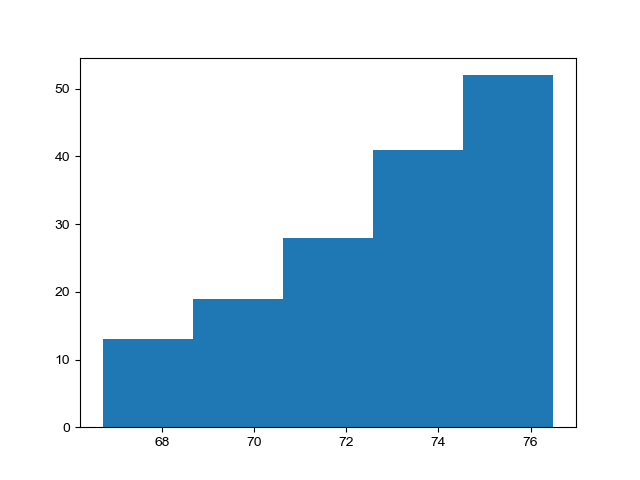

<IPython.core.display.Javascript object>


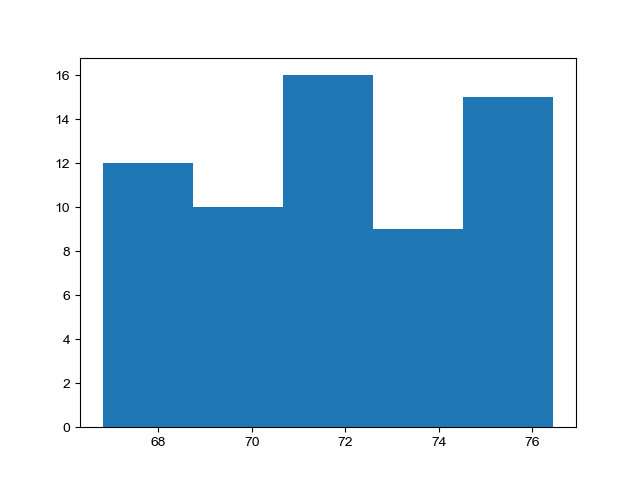

In [174]:

for _gene_name in pb_dict:
    plt.figure()
    plt.hist([_v['tm'] for _v in pb_dict[_gene_name].kept_probes.values()],5)

In [182]:
def sort_probes_for_gene(kept_pb_dict, ):
    pb_start_dict = {}
    pb_strands = []
    for _pb, _info in kept_pb_dict.items():
        #
        #print(_info['reg_name'])
        _reg_id = int(_info['reg_name'].split('name_')[1].split('_')[0].split('-')[-1])
        _region = _info['reg_name'].split('loc_')[1].split('_')[0]
        _chr = _region.split(":")[0]
        _start, _end = _region.split(
            ':')[1].split('_')[0].split('-')
        _start, _end = int(_start), int(_end)
        _strand =  _info['reg_name'].split('strand_')[1].split('_')[0]
        if _strand == '+':
            _pb_start = _start + int(_info['pb_index'])
        elif _strand == '-':
            _pb_start = _end - int(_info['pb_index'])
        # create list
        pb_start_dict[_pb] = _pb_start
        pb_strands.append(_strand)
    # summarize
    unique_strands = np.unique(pb_strands)
    sorted_pbs = [_pb for _pb, _pb_start in sorted(pb_start_dict.items(), key=lambda v:v[1])]
    if len(unique_strands) == 1 and unique_strands[0] == '-':
        sorted_pbs = sorted_pbs[::-1]
    
    sorted_pb_dict = {_pb:kept_pb_dict[_pb] for _pb in sorted_pbs}
    
    return sorted_pb_dict
            
#sort_probes_for_gene(pb_dic['Acpp'].kept_probes)

In [187]:
# filter by genome counts
reload(library_tools.quality_check)

num_probes_kept = 48 # max num of probes kept for each region
filtered_pb_dict = {}
for _gene_name, _pbde in pb_dict.items():
    print(_gene_name)
    _pbde.kept_probes = {_pb: _info 
                         for _pb,_info in list(sort_probes_for_gene(_pbde.kept_probes).items())[:min(num_probes_kept, len(_pbde.kept_probes))] }
    filtered_pb_dict[_gene_name] = _pbde
#filtered_pb_dic = library_tools.quality_check.Screen_probe_by_hit(library_folder, pb_dic, num_probes_kept,
#                                                                  hit_type='transcriptome')

## filter by minimum number of probes in each region
min_num_probes = 12
removed_regions = []
for _rid, _pb_class in filtered_pb_dict.items():
    if len(_pb_class.kept_probes) < min_num_probes:
        print(f"region: {_rid} removed with {len(_pb_class.kept_probes)} probes")
        removed_regions.append(_rid)
for _rid in removed_regions:
    del(filtered_pb_dict[_rid])

Aire
Krt5


<IPython.core.display.Javascript object>


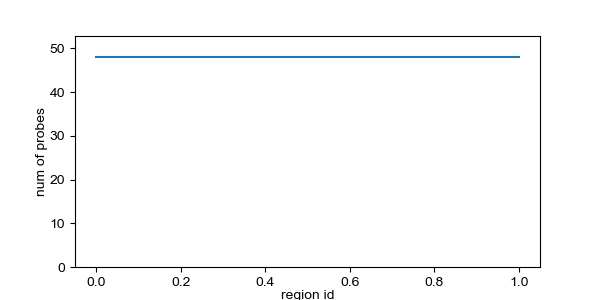

In [188]:
pb_num_dict = {_k:len(_v.kept_probes) for _k,_v in filtered_pb_dict.items()}

pb_nums = np.array(list(pb_num_dict.values()))
plt.figure(figsize=(6,3), dpi=100)
plt.plot(pb_nums)
#plt.plot(np.ones(len(pb_nums))*20)
plt.ylabel(f"num of probes", labelpad=1)
plt.xlabel(f"region id", labelpad=1)
plt.ylim([0, num_probes_kept*1.1])
plt.show()

# 3. Load and asssemble probes

In [246]:
gene_2_readout_dict

{'Ccl21a': ['u0', 'c7', 'c26', 'c35'],
 'Krt14': ['u1', 'c23', 'c34', 'c47'],
 'Krt5': ['u2', 'c13', 'c17', 'c34'],
 'Col6a1': ['u3', 'c2', 'c23', 'c43'],
 'Lifr': ['u4', 'c2', 'c26', 'c38'],
 'Itga6': ['u5', 'c16', 'c22', 'c49'],
 'Col4a1': ['u6', 'c9', 'c10', 'c41'],
 'Ascl1': ['u7', 'c26', 'c29', 'c41'],
 'Cald1': ['u8', 'c10', 'c23', 'c39'],
 'Krt17': ['u9', 'c7', 'c48', 'c49'],
 'C3': ['u10', 'c9', 'c20', 'c27'],
 'Trp63': ['u11', 'c17', 'c32', 'c40'],
 'Dclk1': ['u12', 'c1', 'c6', 'c13'],
 'Trpm5': ['u13', 'c6', 'c37', 'c43'],
 'Ly6g6f': ['u14', 'c3', 'c12', 'c31'],
 'Avil': ['u15', 'c11', 'c15', 'c49'],
 'Alox5ap': ['u16', 'c9', 'c38', 'c44'],
 'Hck': ['u17', 'c0', 'c17', 'c28'],
 'Plk2': ['u18', 'c5', 'c13', 'c22'],
 'Pik3r5': ['u19', 'c27', 'c46', 'c47'],
 'Agt': ['u20', 'c6', 'c29', 'c34'],
 'Nrgn': ['u21', 'c5', 'c25', 'c42'],
 'Plac8': ['u22', 'c7', 'c12', 'c20'],
 'Fxyd6': ['u23', 'c11', 'c34', 'c46'],
 'Pou2f3': ['u24', 'c33', 'c40', 'c47'],
 'Ccl20': ['u25', 'c3', 'c13',

## 3.2 loading components

### primers
pick primer set 2, 9 for 5kb (consistent with CTP-06)

In [190]:
primer_folder = r'\\10.245.74.212\Chromatin_NAS_2\Libraries\Primers'
primers = library_tools.assemble.load_primers([2,9], _primer_folder=primer_folder)

- Picked primer: ID: W1A03_primer_2
Name: W1A03_primer_2
Description: W1A03_primer_2
Number of features: 0
Seq('CCCGCAATGGCTGACAACCG')
- Picked primer: ID: W1A10_primer_9
Name: W1A10_primer_9
Description: W1A10_primer_9
Number of features: 0
Seq('TAATACGACTCACTATAGGGATTGCCGCATGGTTTCCG')


### readouts

1. unique readouts from DNA set

2. MERFISH bits for combinatorial

In [193]:
gene_2_readout_dict = {
    'Aire':['u0','u1'],
    'Krt5':['u2','u3'],
}

In [194]:
# collect types
readout_usage_by_type = {}
for _gene, _infos in gene_2_readout_dict.items():
    for _info in _infos:
        if _info[0] not in readout_usage_by_type:
            readout_usage_by_type[_info[0]] = []
        if int(_info[1:]) not in readout_usage_by_type[_info[0]]:
            readout_usage_by_type[_info[0]].append(int(_info[1:]))

In [195]:
readout_usage_by_type

{'u': [0, 1, 2, 3]}

### unique

In [196]:
readout_usage_dict = {_type:len(_v) for _type,_v in readout_usage_by_type.items()}
readout_dict ={}

In [198]:
reload(library_tools.assemble)
overwrite_readout_usage = True
readout_folder = r'\\10.245.74.212\Chromatin_NAS_2\Libraries\Readouts'
readout_start = 0
num_color = 2

unique_readouts = library_tools.assemble.load_readouts(readout_usage_dict['u'], 
                                                       _type='merfish_readouts', 
                                                       _readout_folder=readout_folder, 
                                                       _num_colors=2, # 750, 647
                                                       _start_id=0,
                                                       )

readout_dict['u'] = unique_readouts

# save
readout_usage_file = os.path.join(library_folder, 'readout_usage.pkl')
if not os.path.isfile(readout_usage_file) or overwrite_readout_usage:
    print('save')
    pickle.dump(readout_dict, open(readout_usage_file, 'wb'))

save


## 3.3 assemble probes

In [208]:
reload(library_tools.assemble)
from ImageAnalysis3.library_tools.assemble import Assemble_probes

cand_probes, readout_summary = Assemble_probes(library_folder, filtered_pb_dict, 
                                               gene_2_readout_dict, readout_dict, primers, 
                                               primer_len=20, 
                                               num_readout_per_probe=2, 
                                               unique_readout_per_probe=True,
                                               rc_targets=False, overwrite=True)

- Assemble probes by given target sequences, readouts and primers.
-- included readout types: ['u']
--- assemblying 48 probes in region: Aire
--- assemblying 48 probes in region: Krt5
-- 96 probes assembled in total.
-- saving 96 probes into file:\\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\smFISH_Aire_Krt5\candidate_probes.fasta
-- saving readout_summary into file:\\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\smFISH_Aire_Krt5\readout_summary.pkl


# 4.Check quality

## 4.1 Load probes

Checking procedures could restart from here

In [209]:
# folder for this library
# candidate full-length probe filename
candidate_basename = 'candidate_probes.fasta' # old version
# load full probes
full_records = []
with open(os.path.join(library_folder, candidate_basename), 'r') as handle:
    for record in SeqIO.parse(handle, "fasta"):
        full_records.append(record)

print(f"Total probe loaded: {len(full_records)}")

Total probe loaded: 96


In [210]:
num_readout_per_probe = 2
primer_len=20
target_len=30
min_num_probes = 12

### 4.1.1 check primer usage

In [211]:
import ImageAnalysis3.library_tools.quality_check as check
reload(check)
primer_check = check._check_primer_usage(full_records, primers[0], primers[1], primer_len=primer_len)
print(primer_check)

-- Checking primer usage, total probes: 96
True


### 4.1.2 check region probe number

In [203]:
reload(check)
reg_size_dic, len_check = check._check_region_size(full_records, 
                                                   min_size=min_num_probes)
print(len_check)

gene: Aire -> 48
gene: Krt5 -> 48
True


### 4.1.3 check readout usage for each gene

In [213]:
check_readout_dict

{'u': [SeqRecord(seq=Seq('ATCCTCCTTCAATACATCCC'), id='RS0015_bit-1', name='RS0015_bit-1', description='RS0015_bit-1', dbxrefs=[]),
  SeqRecord(seq=Seq('ACACTACCACCATTTCCTAT'), id='RS0083_bit-2', name='RS0083_bit-2', description='RS0083_bit-2', dbxrefs=[]),
  SeqRecord(seq=Seq('ACTCCACTACTACTCACTCT'), id='RS0095_bit-3', name='RS0095_bit-3', description='RS0095_bit-3', dbxrefs=[]),
  SeqRecord(seq=Seq('ACCCTCTAACTTCCATCACA'), id='RS0109_bit-4', name='RS0109_bit-4', description='RS0109_bit-4', dbxrefs=[])]}

In [230]:
reload(check)
check_readout_dict = pickle.load(open(os.path.join(library_folder, 'readout_usage.pkl'), 'rb'))

reg_readout_dic, reg2readout_check = check._check_region_to_readouts(full_records, check_readout_dict, 
                                                                     total_readout_num=num_readout_per_probe)
print(reg2readout_check)

Aire -> ['RS0015_bit-1', 'RS0083_bit-2']
Krt5 -> ['RS0095_bit-3', 'RS0109_bit-4']
True


In [212]:
full_records

[SeqRecord(seq=Seq('CCCGCAATGGCTGACAACCGGGGATGTATTGAAGGAGGATGGTATAGTATGGGT...TCC'), id='loc_10:78043271-78043388_gene_Aire_pb_0_pos_70_strand_-_readouts_[RS0015_bit-1_u,RS0015_bit-1_u]_primers_[W1A03_primer_2,W1A10_primer_9]', name='loc_10:78043271-78043388_gene_Aire_pb_0_pos_70_strand_-_readouts_[RS0015_bit-1_u,RS0015_bit-1_u]_primers_[W1A03_primer_2,W1A10_primer_9]', description='loc_10:78043271-78043388_gene_Aire_pb_0_pos_70_strand_-_readouts_[RS0015_bit-1_u,RS0015_bit-1_u]_primers_[W1A03_primer_2,W1A10_primer_9]', dbxrefs=[]),
 SeqRecord(seq=Seq('CCCGCAATGGCTGACAACCGATAGGAAATGGTGGTAGTGTCTCTTTGGGATAAG...TCC'), id='loc_10:78043078-78043216_gene_Aire_pb_1_pos_61_strand_-_readouts_[RS0083_bit-2_u,RS0083_bit-2_u]_primers_[W1A03_primer_2,W1A10_primer_9]', name='loc_10:78043078-78043216_gene_Aire_pb_1_pos_61_strand_-_readouts_[RS0083_bit-2_u,RS0083_bit-2_u]_primers_[W1A03_primer_2,W1A10_primer_9]', description='loc_10:78043078-78043216_gene_Aire_pb_1_pos_61_strand_-_readouts_[RS0083_bit-2

### 4.1.4 check readout usage in the library

In [233]:
reload(check)
readout_reg_dic, readout2reg_check = check._check_readout_to_region(reg_readout_dic, full_records, 
                                                                    check_readout_dict, primer_len=primer_len, 
                                                                    target_len=target_len,
                                                                    probe_readout_num=num_readout_per_probe)

print(readout2reg_check)

-- extracting probes from >region:Aire, region:Krt5,  > Done.
-- inverting region_to_readout dict
RS0015_bit-1 -> ['Aire']
RS0083_bit-2 -> ['Aire']
RS0095_bit-3 -> ['Krt5']
RS0109_bit-4 -> ['Krt5']
True


### 4.1.5 check bewteen probes

In [234]:
# construct internal map
int_map = check._construct_internal_map(full_records, library_folder) 

-- saving internal 17-mer map to file:\\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\smFISH_Aire_Krt5\probe_table_17.npz


In [235]:
# internal check probes
readout_count_dic, readout_count_check = check._check_readout_in_probes(readout_reg_dic, reg_size_dic, int_map, readout_dict)
print(readout_count_check)

True


In [241]:
# check between probes
reload(check)
kept_records, removed_count = check._check_between_probes(full_records, int_map, 
                                                          primer_len=primer_len, target_len=target_len)

-- total probes removed by internal screening: 0


In [242]:
del(int_map)

### 4.1.6 finish checking, save

In [243]:
# save kept records
with open(os.path.join(library_folder, 'filtered_full_probes.fasta'), 'w') as output_handle:
    SeqIO.write(kept_records, output_handle, "fasta")

## 4.2 BLAST screening of probes

create the local blast database by:
```bash
makeblastdb -in C:\Users\puzheng\Documents\Tools\lowercase_masked\Mus_musculus.GRCm38.dna_sm.merged.fa -dbtype nucl -parse_seqids -out GRCm38_ensembl -title "Mouse chromosomes soft masked" -blastdb_version 4![image.png](attachment:image.png)
```

The outputs are:
```bash
Building a new DB, current time: 03/30/2021 21:49:18
New DB name:   C:\Users\puzheng\Documents\Tools\GRCm38_ensembl
New DB title:  Mouse chromosomes soft masked
Sequence type: Nucleotide
Keep MBits: T
Maximum file size: 1000000000B
Adding sequences from FASTA; added 66 sequences in 42.2668 seconds.
```

* This library is blasted against genome because this is an intronic RNA library

In [252]:
list(filtered_pb_dict['Krt5'].kept_probes.keys())[34]

b'AAAGTGTGTGTGAGAGTTAGAGGTGTGTGT'

In [247]:
check._parsing_probe_sequence('CCCGCAATGGCTGACAACCGAGAGTGAGTAGTAGTGGAGTAAAGTGTGTGTGAGAGTTAGAGGTGTGTGTAGAGTGAGTAGTAGTGGAGTCGGAAACCATGCGGCAATCC',
                              primer_len=primer_len, readout_len=20)

AttributeError: 'str' object has no attribute 'seq'

In [253]:
blast_database = os.path.join(reference_folder, 'blast_database', 'GRCm38_ensembl')

check.Blast_probes(kept_records, library_folder, num_threads=20, blast_evalue=1000,
                   blast_db=blast_database)

- Blast probe against \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\blast_database\GRCm38_ensembl
-- number of probes loaded: 96
-- processing region: Aire with 48 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\smFISH_Aire_Krt5\blast\probe_gene_Aire.fasta
--- *blasting region: Aire
--- total time for blast Aire: 10.770423889160156
-- processing region: Krt5 with 48 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\smFISH_Aire_Krt5\blast\probe_gene_Krt5.fasta
--- *blasting region: Krt5
--- total time for blast Krt5: 10.557186365127563


### 4.2.1 screen probe by blast results

This step has 2 different cutoffs:

hard_cutoff: whether a probe has any ~40mer hit somewhere else, if so just dump the probe

soft_cutoff: whether a probe has a lot of ~20mer off-target hits, if exceed certain amount then dump the probe

In [254]:
# screen
import ImageAnalysis3.library_tools.quality_check as check
reload(check)
num_probes_per_region = 90
kept_pbs, blast_keep_dic, hard_count_list, soft_count_list = check.Screening_Probes_by_Blast(library_folder, 
                                                                                             num_probes_per_region,
                                                                                             hard_thres=target_len,
                                                                                             soft_count_th=50,
                                                                                             )

- Number of probes loaded: 96
- Number of regions in this library: 2
-- checking probes in region: Aire
--- number of probes: 48 , kept by blast: 48 , if remove dups: 48
-- number of probes kept for this region: 48
-- checking probes in region: Krt5
--- gene=Krt5, id=34 removed by hard count = 0
--- gene=Krt5, id=35 removed by hard count = 0
--- number of probes: 48 , kept by blast: 46 , if remove dups: 46
-- number of probes kept for this region: 46
- summarize
-- region: Aire , number of probes: 48
-- region: Krt5 , number of probes: 46
- Number of probes kept: 94
- Saving to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\smFISH_Aire_Krt5\.\blast_full_probes.fasta


In [11]:
print(kept_pbs[0].seq)
print(kept_pbs[0].id)

CCCGCAATGGCTGACAACCGTACCTCCATGCCGATAGAGTTACCTCCATGCCGATAGAGTTGCCTGTTCTCCTGAAGTAACCTGTCAGTCTACCTCCATGCCGATAGAGTTACCTCCATGCCGATAGAGTCGGAAACCATGCGGCAATCC
loc_9:104326978-104337542_gene_Acpp_pb_5_pos_213_strand_-_readouts_[Stv_59_c,Stv_59_c,Stv_59_c,Stv_59_c]


In [260]:
# slice probes
sliced_kept_pbs = [_pb[15:-20] for _pb in kept_pbs]

In [261]:
len(sliced_kept_pbs[0].seq)

75

In [262]:
0.19 * 55 * 96

1003.1999999999999

In [263]:
# create a dataframe and save to upload
import pandas as pd

In [277]:
library_folder

'\\\\10.245.74.212\\Chromatin_NAS_2\\Libraries\\CTP-10_Aire\\smFISH_Aire_Krt5'

In [274]:
data_dict = {'Well Position':[], 'Name':[], 'Sequence':[]}
well_ids = list('ABCDEGFH')
for _i, _pb in enumerate(cand_probes):
    _wid = f"{well_ids[int(_i/12)]}{_i%12+1}"
    print(_wid)
    _name = _pb.id.split('gene_')[1].split('_')[0] + '_pb_' + _pb.id.split('pb_')[1].split('_')[0]
    _seq = _pb.seq[35:-20]
    data_dict['Well Position'].append(_wid)
    data_dict['Name'].append(_name)
    data_dict['Sequence'].append(str(_seq))


A1
A2
A3
A4
A5
A6
A7
A8
A9
A10
A11
A12
B1
B2
B3
B4
B5
B6
B7
B8
B9
B10
B11
B12
C1
C2
C3
C4
C5
C6
C7
C8
C9
C10
C11
C12
D1
D2
D3
D4
D5
D6
D7
D8
D9
D10
D11
D12
E1
E2
E3
E4
E5
E6
E7
E8
E9
E10
E11
E12
G1
G2
G3
G4
G5
G6
G7
G8
G9
G10
G11
G12
F1
F2
F3
F4
F5
F6
F7
F8
F9
F10
F11
F12
H1
H2
H3
H4
H5
H6
H7
H8
H9
H10
H11
H12


In [280]:

idt_plate = pd.DataFrame(data_dict)
idt_plate.to_excel(os.path.join(library_folder, 'idt_plate_normal.xlsx'), index=False)

# RC targeting sequence and order another plate

In [303]:
rc_data_dict = {'Well Position':[], 'Name':[], 'Sequence':[]}
well_ids = list('ABCDEGFH')
for _i, _pb in enumerate(cand_probes):
    _wid = f"{well_ids[int(_i/12)]}{_i%12+1}"
    print(_wid)
    _name = _pb.id.split('gene_')[1].split('_')[0] + '_pb_' + _pb.id.split('pb_')[1].split('_')[0] + '_rc'
    _seq = _pb.seq[35:40] + _pb.seq[40:70].reverse_complement() + _pb.seq[-40:-20]
    
    rc_data_dict['Well Position'].append(_wid)
    rc_data_dict['Name'].append(_name)
    rc_data_dict['Sequence'].append(str(_seq))

A1
A2
A3
A4
A5
A6
A7
A8
A9
A10
A11
A12
B1
B2
B3
B4
B5
B6
B7
B8
B9
B10
B11
B12
C1
C2
C3
C4
C5
C6
C7
C8
C9
C10
C11
C12
D1
D2
D3
D4
D5
D6
D7
D8
D9
D10
D11
D12
E1
E2
E3
E4
E5
E6
E7
E8
E9
E10
E11
E12
G1
G2
G3
G4
G5
G6
G7
G8
G9
G10
G11
G12
F1
F2
F3
F4
F5
F6
F7
F8
F9
F10
F11
F12
H1
H2
H3
H4
H5
H6
H7
H8
H9
H10
H11
H12


In [304]:
rc_idt_plate = pd.DataFrame(rc_data_dict)
rc_idt_plate.to_excel(os.path.join(library_folder, 'rc_idt_plate_normal.xlsx'), index=False)

AttributeError: 'str' object has no attribute 'complement'

In [295]:
pb_designer.kept_probes[data_dict['Sequence'][0][5:-20].encode()]

{'name': 'gene_Aire_id_gene:ENSMUSG00000000731_name_Aire-208-smintron-1_type_smintron_strand_-_loc_10:78043271-78043388_pb_70',
 'reg_index': 0,
 'reg_name': 'gene_Aire_id_gene:ENSMUSG00000000731_name_Aire-208-smintron-1_type_smintron_strand_-_loc_10:78043271-78043388',
 'pb_index': 70,
 'strand': '-',
 'gc': 0.5,
 'tm': 73.41123201847478,
 'map_genome': 15,
 'map_rep_genome': 0,
 'map_self_sequences': 14}

In [296]:
data_dict['Sequence'][0][5:-20]

'GGTATAGTATGGGTTTTGGCTGAGGTTGGG'

In [302]:
pb_designer.kept_probes[str(Seq(rc_data_dict['Sequence'][0][5:-20]).reverse_complement()).encode()]

{'name': 'gene_Aire_id_gene:ENSMUSG00000000731_name_Aire-208-smintron-1_type_smintron_strand_-_loc_10:78043271-78043388_pb_70',
 'reg_index': 0,
 'reg_name': 'gene_Aire_id_gene:ENSMUSG00000000731_name_Aire-208-smintron-1_type_smintron_strand_-_loc_10:78043271-78043388',
 'pb_index': 70,
 'strand': '-',
 'gc': 0.5,
 'tm': 73.41123201847478,
 'map_genome': 15,
 'map_rep_genome': 0,
 'map_self_sequences': 14}

In [285]:
data_dict['Sequence'][0].encode()[-20:]

b'GGGATGTATTGAAGGAGGAT'

In [292]:
rc_data_dict['Sequence'][0].encode()[-20:]

b'GGGATGTATTGAAGGAGGAT'